# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Lines** 

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import pickle
%matplotlib inline

## Camera Calibration

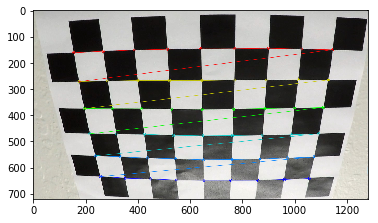

In [2]:
#reading in an image
calibrate = mpimg.imread('camera_cal/calibration1.jpg')
nx = 9
ny = 6
objpoints = []
imgpoints = []

objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

gray = cv2.cvtColor(calibrate,cv2.COLOR_RGB2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(calibrate, (nx,ny), corners, ret)
    plt.imshow(img)  
    # Save image
    save = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    cv2.imwrite('output_images/chessboard1.jpg',save)

In [3]:
#reading in a group of images

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
objpoints = []
imgpoints = []

objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
    else:
        print("Image size is wrong in image number:", idx)


Image size is wrong in image number: 4
Image size is wrong in image number: 8


(1280, 720)


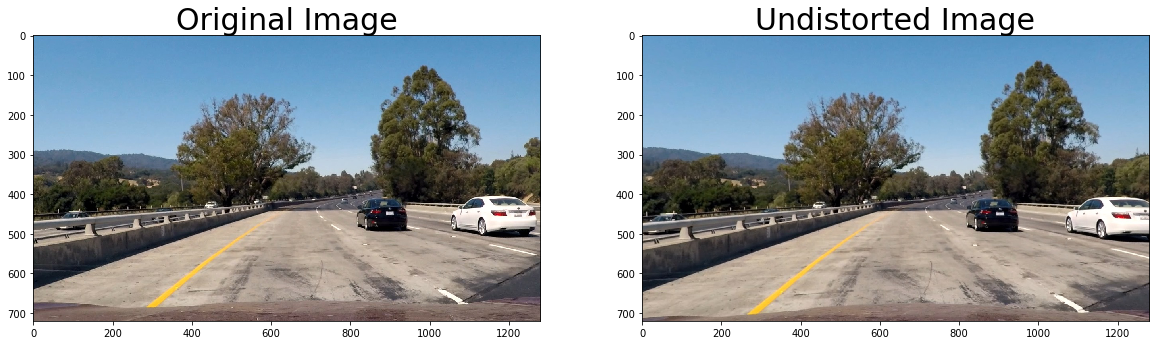

In [4]:
# Camera calibration given object points and image points
%matplotlib inline

# Test undistortion on an image
img = mpimg.imread('test_images/test1.jpg')
img_size = (img.shape[1], img.shape[0])
print(img_size)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Save image
save = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite('output_images/undistortedImage.jpg',save)
    
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Images

In [5]:
import os
os.listdir("test_images/")


['test5.jpg',
 'straight_lines1.jpg',
 'test1.jpg',
 'test3.jpg',
 'test2.jpg',
 'test7.jpg',
 'test9.jpg',
 'straight_lines2.jpg',
 'test6.jpg',
 'test4.jpg',
 'test8.jpg']

## Color and Gradient Threshold

## Gradient Threshold

In [6]:
###Functions###
def sobelOperator(img, orient='x', thresh=(20, 100)):
    
    axis = (1,0) if (orient == 'x') else (0,1);
    
    gray =  cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(gray, cv2.CV_64F, axis[0],axis[1])
    abs_sobel = np.absolute(sobel)
    
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    return binary_output


def sobelMagnitud(img, sobel_kernel=7, thresh=(20, 100)):
        
    gray =  cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobelxM = np.square(sobelx)
    sobelyM = np.square(sobely)
    sobelM = np.sqrt(sobelxM+sobelyM)
    
    abs_sobel = np.absolute(sobelM)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    return binary_output

def sobelAngle(img, sobel_kernel=15, thresh=(0.6, 1.3)):
    
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    ang_sobel = np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(ang_sobel)
    binary_output[ (ang_sobel >= thresh[0]) & (ang_sobel <= thresh[1])  ] = 1
    
    return binary_output

In [40]:
%matplotlib inline
img = mpimg.imread('test_images/test5.jpg')
image = cv2.undistort(img, mtx, dist, None, mtx)

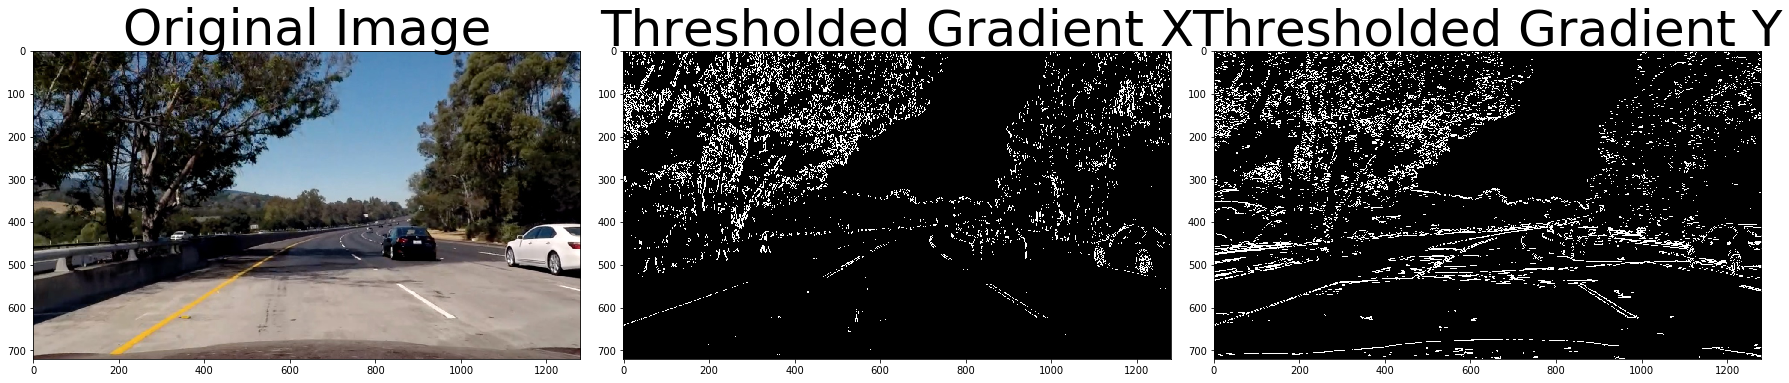

In [41]:
#Obtaining the gradient in X and Y

gradx = sobelOperator(image, orient='x', thresh=(30, 100))
grady = sobelOperator(image, orient='y', thresh=(30, 100))

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(gradx, cmap='gray')
ax2.set_title('Thresholded Gradient X', fontsize=50)

ax3.imshow(grady, cmap='gray')
ax3.set_title('Thresholded Gradient Y', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

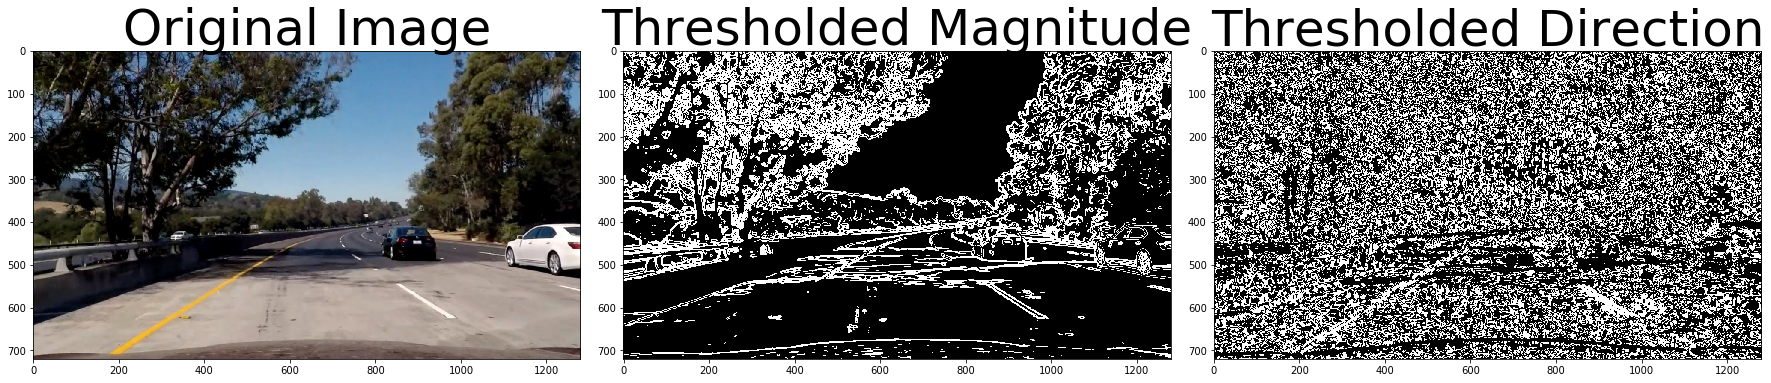

In [42]:
#Obtaining Magnitud and Angle of the gradient 
mag = sobelMagnitud(image, sobel_kernel=7, thresh=(20, 100))
ang = sobelAngle(image, sobel_kernel=15, thresh=(0.6, 1.3))

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(mag, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)

ax3.imshow(ang, cmap='gray')
ax3.set_title('Thresholded Direction', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

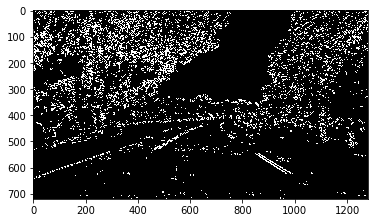

In [43]:
#Combined Gradient Thresholds
combinedGrad = np.zeros_like(mag)
combinedGrad[((gradx == 1) & (grady == 1)) | ((mag == 1) & (ang == 1))] = 1
plt.imshow(combinedGrad, cmap='gray')

## Color Threshold

In [44]:
#Function to convert RGB image to HLS
def imageThreshold(img, thresh=(90, 255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    return binary

def imageThresholdR(img, thresh=(210, 255)):
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    y = img[:,:,0]
    u = img[:,:,1]
    v = img[:,:,2]
    
    binary = np.zeros_like(y)
    binary[(y > thresh[0]) & (y <= thresh[1])] = 1
    
    return binary

def imageConvert(img):
    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # For yellow
    yellow = cv2.inRange(HSV, (20, 100, 100), (50, 255, 255))

    # For white
    sensitivity_1 = 68
    white = cv2.inRange(HSV, (0,0,255-sensitivity_1), (255,20,255))

    sensitivity_2 = 60
    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = HLS[:,:,2]
    #white_2 = np.zeros_like(S)
    #white_2[(S > 110) & (S <= 255)] = 1
    white_2 = cv2.inRange(HLS, (0,255-sensitivity_2,0), (255,255,sensitivity_2))
    
    white_3 = cv2.inRange(img, (200,200,2200), (255,255,255))

    bit_layer = np.zeros_like(yellow)
    newImg = bit_layer | yellow | white  | white_2 | white_3
    binary = np.zeros_like(newImg)
    binary[(newImg > 0) ] = 1
    
    return white_2

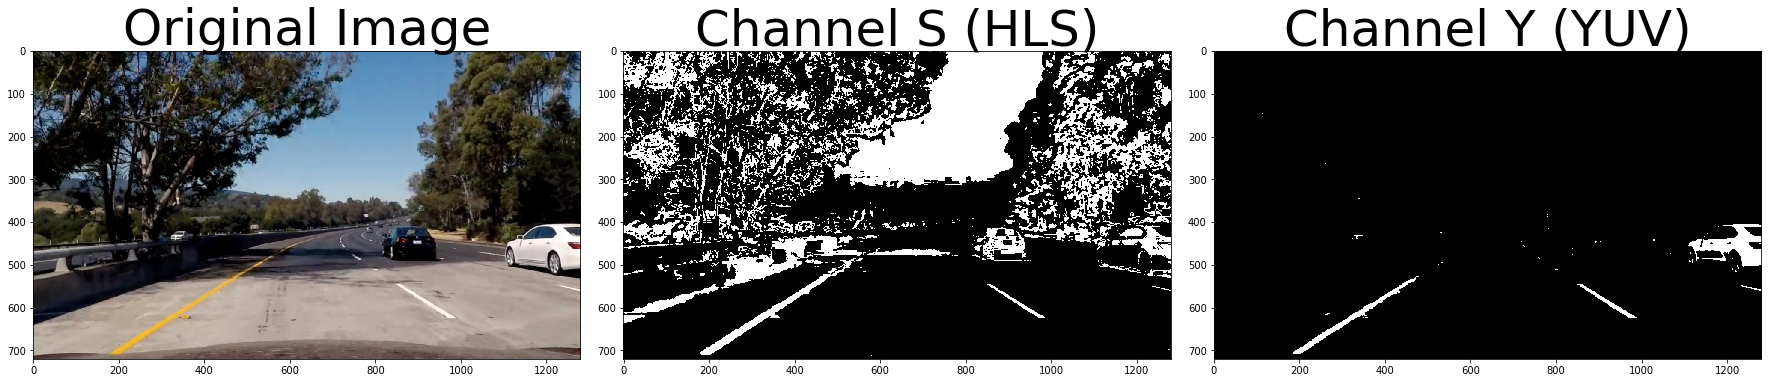

In [45]:
#Obtaining S channel from HLS image
sChannel = imageThreshold(image)

rChannel = imageThresholdR(image)

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(sChannel, cmap='gray')
ax2.set_title('Channel S (HLS)', fontsize=50)

ax3.imshow(rChannel, cmap='gray')
ax3.set_title('Channel Y (YUV)', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

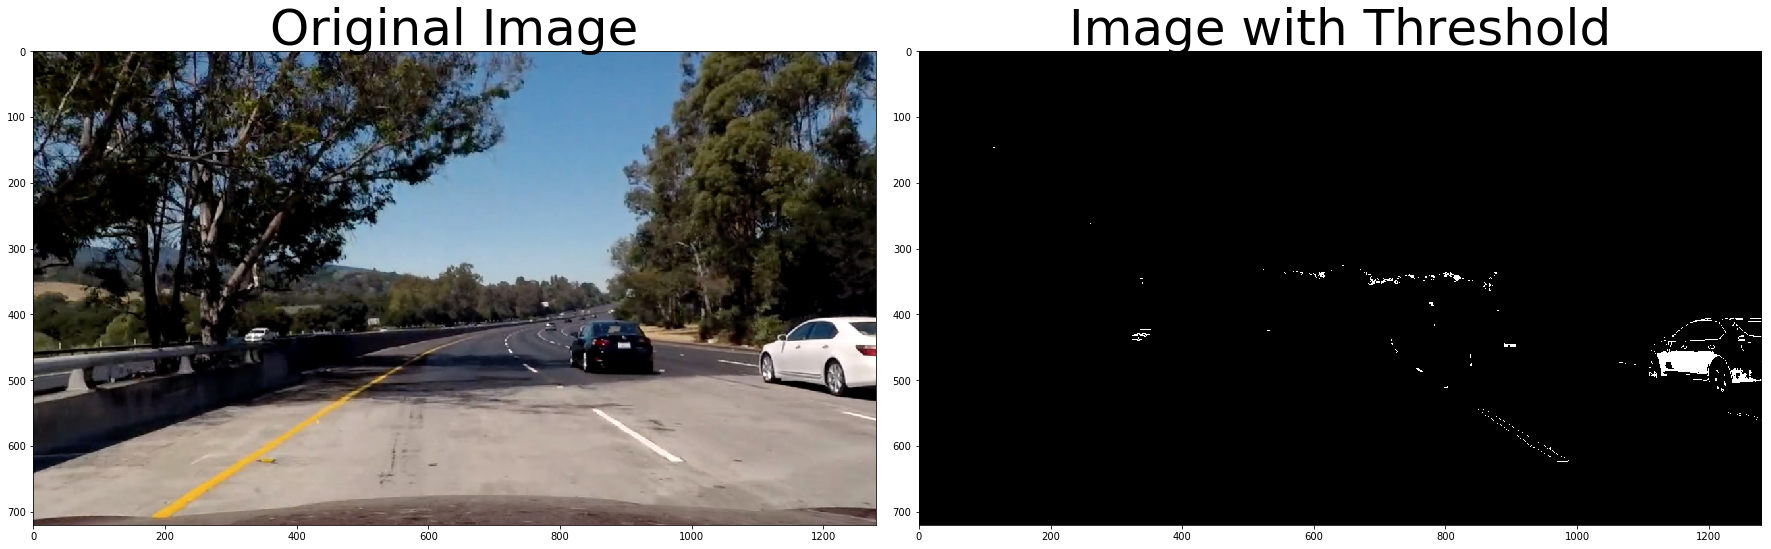

In [46]:
%matplotlib inline
#Obtaining image from Color Threshold
channel = imageConvert(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(channel, cmap='gray')
ax2.set_title('Image with Threshold', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

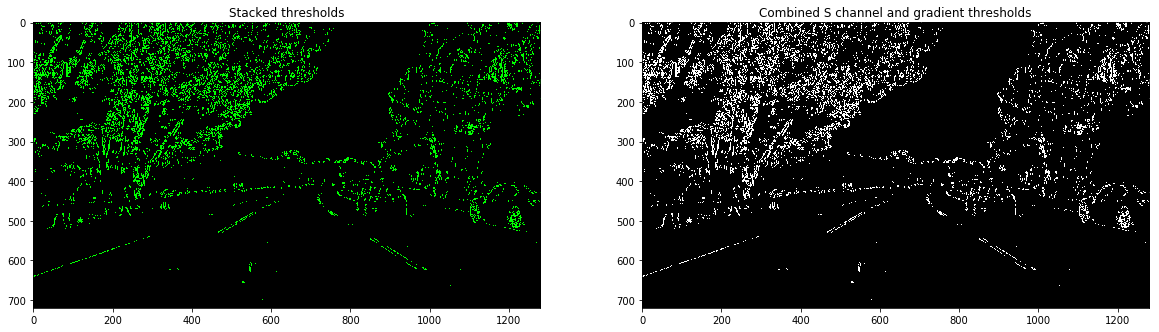

In [47]:
#Combined  Thresholds
color_binary = np.dstack(( np.zeros_like(gradx), 255*gradx, 255*channel))

# Combine the two binary thresholds
combined_binary = np.zeros_like(gradx)
combined_binary[ (gradx == 1) | (channel == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

## Perspective transformation

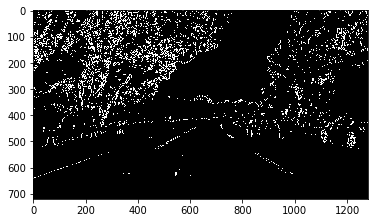

In [48]:
%matplotlib qt
plt.imshow(combined_binary,cmap='gray')

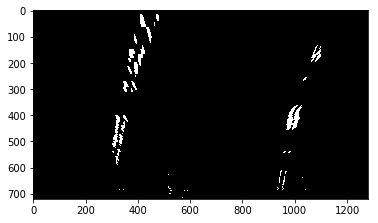

In [49]:
%matplotlib inline
sp1 = [580,460]
sp2 = [197,720]
sp3 = [1085,720]
sp4 = [700,460]

#sp1 = [553,480]
#sp2 = [211,720]
#sp3 = [1090,720]
#sp4 = [743,480]
sp1 = [537,490]
sp2 = [197,720]
sp3 = [1200,720]
sp4 = [750,490]

sp1 = [585,460]
sp2 = [235,720]
sp3 = [1080,720]
sp4 = [690,460]

sp1 = [600,450]
sp2 = [235,720]
sp3 = [1075,720]
sp4 = [680,450]

dp1 = [350,0]
dp2 = [350,720]
dp3 = [900,720]
dp4 = [900,0]

p1 = (300,0)
p2 = (300,720)
p3 = (1100,720)
p4 = (1100,0)

src = np.array([sp1,sp2,sp3,sp4],np.float32)
dst = np.array([dp1,dp2,dp3,dp4],np.float32)


M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(combined_binary, M, (combined_binary.shape[1],combined_binary.shape[0]), flags=cv2.INTER_LINEAR)

#pts = np.array([dp1,dp2,dp3,dp4], np.int32)
#pts = pts.reshape((-1,1,2))
#cv2.polylines(warped,[pts],True,(255,0,0), thickness=5, lineType=8,)

mask = np.zeros_like(warped) 
ignore_mask_color = 255
vertices = np.array([[p1,p2,p3,p4]], dtype=np.int32)
#vertices = np.array([[(150,1000),(420,340), (540, 340), (720,1000)]], dtype=np.int32)
#filling pixels inside the polygon defined by "vertices" with the fill color    
cv2.fillPoly(mask, vertices, ignore_mask_color)

binary_warped = cv2.bitwise_and(warped, mask)
    
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(warped,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
#binary_warped = cv2.bitwise_and(dilation, mask)

plt.imshow(binary_warped,cmap='gray')




## Locate the Lane Lines and Fit a Polynomial

In [50]:
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
#histogram = np.sum(binary_warped, axis=0)
histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
#leftx_base = np.argmax(histogram[:midpoint])
#rightx_base = np.argmax(histogram[midpoint:]) + midpoint
leftx_base = np.argmax(histogram[350:500]) + 350
rightx_base = np.argmax(histogram[850:1150]) + 850

# Choose the number of sliding windows
nwindows = 18
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 60
# Set minimum number of pixels found to recenter window
minpix = 30
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)



## Visualization

(720, 0)

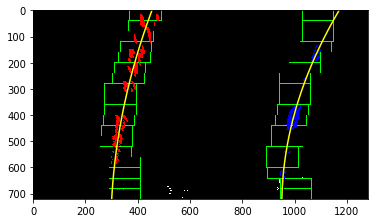

In [54]:
# Generate x and y values for plotting
%matplotlib qt
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

## Measuring Curvature

In [55]:
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension
#y_eval = np.max(ploty)
y_eval = np.max(ploty)/2
# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
print ((left_curverad+right_curverad)/2)
# Example values: 632.1 m    626.2 m

744.181309387 m 418.239523397 m
581.210416392


## Measuring distance from the center

In [56]:
maxRX = np.max(right_fitx)
minRX = np.min(right_fitx)

maxLX = np.max(left_fitx)
minLX = np.min(left_fitx)

centerR = (maxRX + minRX)/2.0
centerL = (maxLX + minLX)/2.0

center = 0.5*binary_warped.shape[1] -  (centerL + centerR)/2

print(center*xm_per_pix, "m")


-0.417166661321 m


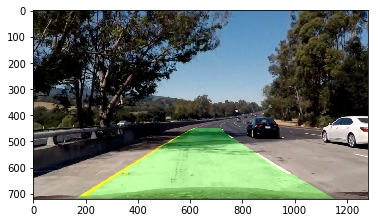

In [57]:
%matplotlib inline
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
polygon = np.zeros_like(warped).astype(np.uint8)

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
cv2.fillPoly(polygon, np.int_([pts]), 255)

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
plt.imshow(result)
